##Contexto do Desafio

Ajudar o Senhor Jo√£o a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento.
Para isso, voc√™ analisar√° dados de vendas, desempenho e avalia√ß√µes das 4 lojas fict√≠cias da Alura Store.
O objetivo √© identificar a loja com menor efici√™ncia e apresentar uma recomenda√ß√£o final baseada nos dados.

### Importa√ß√£o dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

##Conhecendo o Dataset
###Estrutura dos Dados- O dataset inclui as seguintes informa√ß√µes:

Produto e Categoria: Itens vendidos e suas classifica√ß√µes.

Pre√ßo e Frete: Valores das vendas e custos associados.

Data de Compra e Local: Informa√ß√µes temporais e geogr√°ficas.

Avalia√ß√£o da Compra: Feedback dos clientes.

Tipo de Pagamento e Parcelas: M√©todos utilizados pelos clientes.

Coordenadas Geogr√°ficas: Localiza√ß√£o das transa√ß√µes.

In [2]:
print(f"Loja 1: {len(loja)} linhas")
print(f"Loja 2: {len(loja2)} linhas")
print(f"Loja 3: {len(loja3)} linhas")
print(f"Loja 4: {len(loja4)} linhas")

Loja 1: 2359 linhas
Loja 2: 2359 linhas
Loja 3: 2359 linhas
Loja 4: 2358 linhas


In [3]:
print(loja.shape, loja2.shape, loja3.shape, loja4.shape)  # Confirma tamanho de cada tabela antes da uni√£o

(2359, 12) (2359, 12) (2359, 12) (2358, 12)


In [4]:
produtos_loja1 = set(loja["Produto"])
produtos_loja4 = set(loja4["Produto"])

diferenca = produtos_loja1 - produtos_loja4
print("Produtos que est√£o na Loja 1, mas faltam na Loja 4:")
print(diferenca)

Produtos que est√£o na Loja 1, mas faltam na Loja 4:
set()


####Observa√ß√£o
A Loja 4 n√£o tem um produto faltando em rela√ß√£o √†s outras lojas. O √∫nico registro a menos pode ser um erro no banco de dados ou uma venda que n√£o foi registrada corretamente.
A diferen√ßa de faturamento da Loja 4 n√£o √© causada pela aus√™ncia de produtos, mas sim pelos pre√ßos m√©dios mais baixos, como vimos antes.


### Cria√ß√£o DataFrame Unificado

In [5]:
import pandas as pd

# Criando uma tabela √∫nica a partir das tabelas individuais
loja["Lojas"] = "Loja 1"
loja2["Lojas"] = "Loja 2"
loja3["Lojas"] = "Loja 3"
loja4["Lojas"] = "Loja 4"

df_unificado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print(df_unificado.head())  # Verifica se a coluna 'Lojas' est√° correta # Confirma se foi adicionada
pd.set_option('display.max_rows', None)



                 Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon   Lojas  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1   

In [6]:
# Exibir as primeiras linhas para conferir
print(df_unificado.shape)

(9435, 13)


In [7]:
pd.set_option("display.max_rows", None)  # Exibe todas as linhas
pd.set_option("display.max_columns", None)  # Exibe todas as colunas


In [8]:
print(df_unificado.columns)  # Lista os nomes das colunas no dataframe consolidado

Index(['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Lojas'],
      dtype='object')


#1. An√°lise do faturamento


In [9]:
print(type(loja))  # Isso mostrar√° se `loja` √© um DataFrame ou uma string

<class 'pandas.core.frame.DataFrame'>


###Faturamento total por loja
Mostra o total de receita gerada por cada loja.

In [10]:
faturamento_total_por_loja = df_unificado.groupby("Lojas")["Pre√ßo"].sum()
print("Faturamento Total por Loja:")
print(faturamento_total_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))



Faturamento Total por Loja:
Lojas
Loja 1    R$ 1.534.509,12
Loja 2    R$ 1.488.459,06
Loja 3    R$ 1.464.025,03
Loja 4    R$ 1.384.497,58
Name: Pre√ßo, dtype: object


In [55]:
# Representa√ß√£o %faturamento loja 4 na rede

faturamento_loja4 = df_unificado[df_unificado["Lojas"] == "Loja 4"]["Pre√ßo"].sum()
faturamento_total = df_unificado["Pre√ßo"].sum()
percentual_faturamento_loja4 = (faturamento_loja4 / faturamento_total) * 100
print(f"O percentual de faturamento da Loja 4 √© de: {percentual_faturamento_loja4:.2f}%")

O percentual de faturamento da Loja 4 √© de: 23.58%


###Faturamento m√©dio por loja

In [11]:
faturamento_medio_por_loja = df_unificado.groupby("Lojas")["Pre√ßo"].mean()
print("Faturamento M√©dio por Loja:")
print(faturamento_medio_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))

Faturamento M√©dio por Loja:
Lojas
Loja 1    R$ 650,49
Loja 2    R$ 630,97
Loja 3    R$ 620,61
Loja 4    R$ 587,15
Name: Pre√ßo, dtype: object


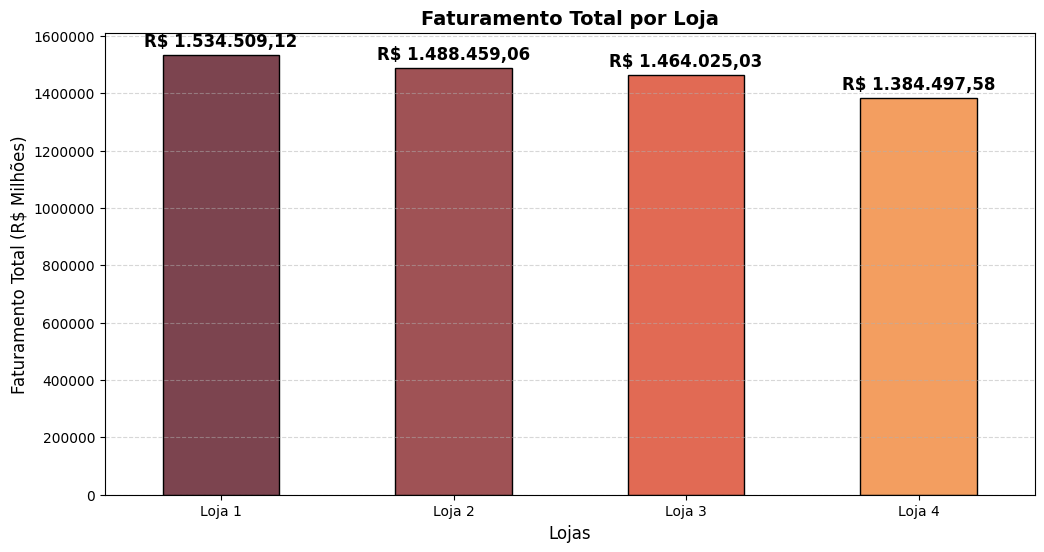

In [12]:
import matplotlib.pyplot as plt

# Configurando o tamanho do gr√°fico antes de plotar
fig, ax = plt.subplots(figsize=(12, 6))

# Cores personalizadas
cores = ["#7C444F", "#9F5255", "#E16A54", "#F39E60"]

# Criando gr√°fico de barras
faturamento_total_por_loja.plot(kind="bar", color=cores, edgecolor="black", ax=ax)

# Adicionando r√≥tulos nas barras
for i, v in enumerate(faturamento_total_por_loja):
    ax.text(i, v + (v * 0.02), f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), ha="center", fontsize=12, fontweight="bold")

# Ajustes no layout do gr√°fico
plt.title("Faturamento Total por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento Total (R$ Milh√µes)", fontsize=12)
plt.ticklabel_format(style="plain", axis="y")  # Evita nota√ß√£o cient√≠fica
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibir o gr√°fico
plt.show()

Por meio do grafico √© possivel comparar a performance geral de cada loja,  mostra qual loja gerou mais receita no per√≠odo. Isso √© √∫til para entender qual unidade √© mais lucrativa.



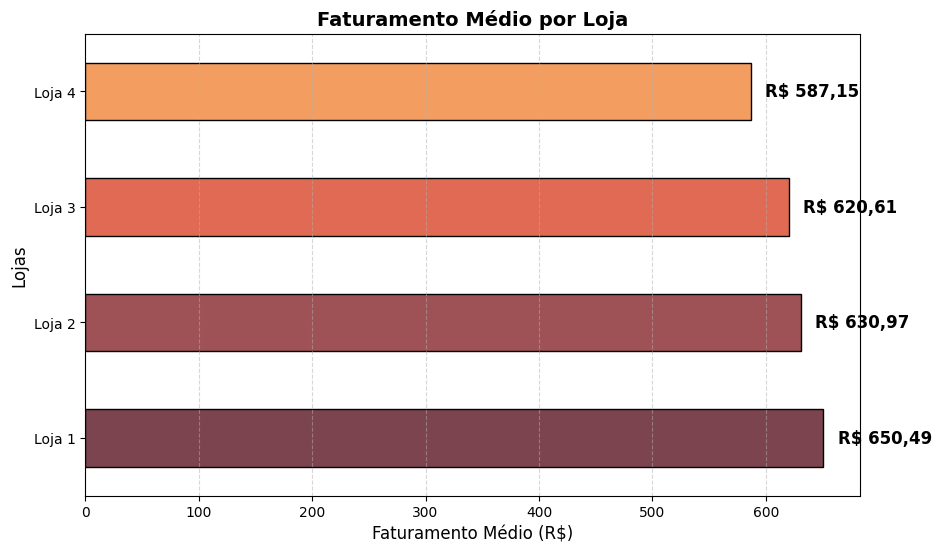

In [13]:
import matplotlib.pyplot as plt

# Criando o gr√°fico
faturamento_medio_por_loja = faturamento_medio_por_loja.astype(float)  # Garante que os valores s√£o num√©ricos
ax = faturamento_medio_por_loja.plot(kind="barh", color=["#7C444F","#9F5255", "#E16A54","#F39E60"], figsize=(10, 6), edgecolor="black")

# Adicionando r√≥tulos nas barras
for i, v in enumerate(faturamento_medio_por_loja):
    ax.text(v + (v * 0.02), i, f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), va="center", fontsize=12, fontweight="bold")

plt.title("Faturamento M√©dio por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento M√©dio (R$)", fontsize=12)
plt.ylabel("Lojas", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Exibir o gr√°fico
plt.show()

###Analise do grafico:
Diferen√ßa de ticket m√©dio entre as lojas ‚Üí Algumas lojas t√™m valores m√©dios mais altos, indicando que seus clientes gastam mais por compra.
Compara√ß√£o direta ‚Üí O formato horizontal permite que vejamos rapidamente qual loja tem maior faturamento m√©dio e qual tem o menor.
Impacto na estrat√©gia ‚Üí Lojas com ticket m√©dio menor podem estar vendendo produtos mais baratos ou atraindo um p√∫blico diferente.


###Margem de lucro por loja

In [14]:
custo_total_por_loja = df_unificado.groupby("Lojas")["Frete"].sum()
margem_lucro_por_loja = (faturamento_total_por_loja - custo_total_por_loja) / faturamento_total_por_loja * 100
print(margem_lucro_por_loja)

Lojas
Loja 1    94.666831
Loja 2    94.671391
Loja 3    94.670674
Loja 4    94.672734
dtype: float64


# 2. Vendas por Categoria


###Quantidade vendas para cada categoria dentro de cada loja

In [15]:
produtos_vendidos_por_categoria = df_unificado.groupby(["Lojas", "Categoria do Produto"])["Produto"].count().reset_index()
produtos_vendidos_por_categoria.rename(columns={"Produto": "Quantidade_Vendas"}, inplace=True)
print(produtos_vendidos_por_categoria)

categorias_mais_populares = produtos_vendidos_por_categoria.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])
print(categorias_mais_populares.groupby("Lojas").head(1))  # Mostra a categoria mais vendida por loja

     Lojas   Categoria do Produto  Quantidade_Vendas
0   Loja 1             brinquedos                324
1   Loja 1       eletrodomesticos                312
2   Loja 1            eletronicos                448
3   Loja 1        esporte e lazer                284
4   Loja 1  instrumentos musicais                182
5   Loja 1                 livros                173
6   Loja 1                 moveis                465
7   Loja 1  utilidades domesticas                171
8   Loja 2             brinquedos                313
9   Loja 2       eletrodomesticos                305
10  Loja 2            eletronicos                422
11  Loja 2        esporte e lazer                275
12  Loja 2  instrumentos musicais                224
13  Loja 2                 livros                197
14  Loja 2                 moveis                442
15  Loja 2  utilidades domesticas                181
16  Loja 3             brinquedos                315
17  Loja 3       eletrodomesticos             

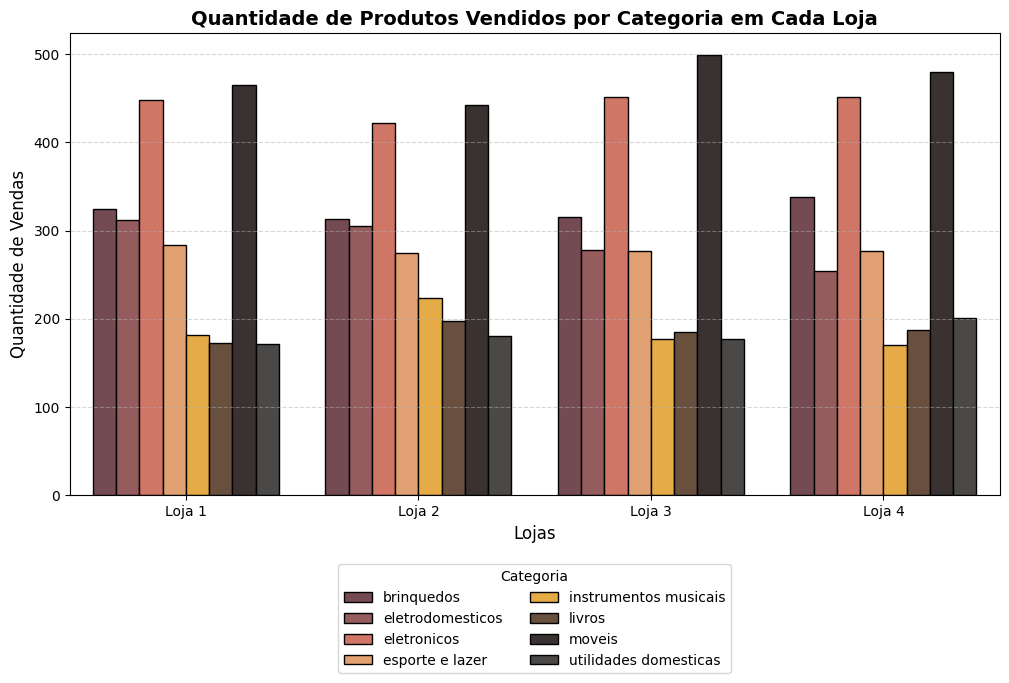

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=produtos_vendidos_por_categoria, x="Lojas", y="Quantidade_Vendas", hue="Categoria do Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C","#6F4E37","#3B3030","#4A4947"], edgecolor="black", width=0.8)

plt.title("Quantidade de Produtos Vendidos por Categoria em Cada Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Categoria", loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

In [38]:
# Filtrando apenas as categorias "M√≥veis" e "Eletr√¥nicos"
categorias_relevantes = ["moveis", "eletronicos"]
faturamento_categorias_relevantes_por_loja = df_unificado[df_unificado["Categoria do Produto"].isin(categorias_relevantes)].groupby("Lojas")["Pre√ßo"].sum()
print(faturamento_categorias_relevantes_por_loja)

# Calculando o percentual
percentual_faturamento = (faturamento_categorias_relevantes_por_loja / faturamento_total_por_loja) * 100

# Formatando os valores para melhor visualiza√ß√£o
percentual_faturamento = percentual_faturamento.apply(lambda x: f"{x:.2f}%")

# Exibindo o resultado
print("Percentual de Faturamento das Categorias M√≥veis e Eletr√¥nicos por Loja:")
print(percentual_faturamento)



Lojas
Loja 1    822837.34
Loja 2    783008.39
Loja 3    815795.48
Loja 4    802672.51
Name: Pre√ßo, dtype: float64
Percentual de Faturamento das Categorias M√≥veis e Eletr√¥nicos por Loja:
Lojas
Loja 1    53.62%
Loja 2    52.61%
Loja 3    55.72%
Loja 4    57.98%
Name: Pre√ßo, dtype: object


# 3. M√©dia de Avalia√ß√£o das Lojas

In [18]:
media_avaliacoes_por_loja = df_unificado.groupby("Lojas")["Avalia√ß√£o da compra"].mean().reset_index()
media_avaliacoes_por_loja.rename(columns={"Avalia√ß√£o da compra": "M√©dia_Avalia√ß√µes"}, inplace=True)

print(media_avaliacoes_por_loja)

    Lojas  M√©dia_Avalia√ß√µes
0  Loja 1          3.976685
1  Loja 2          4.037304
2  Loja 3          4.048326
3  Loja 4          3.995759


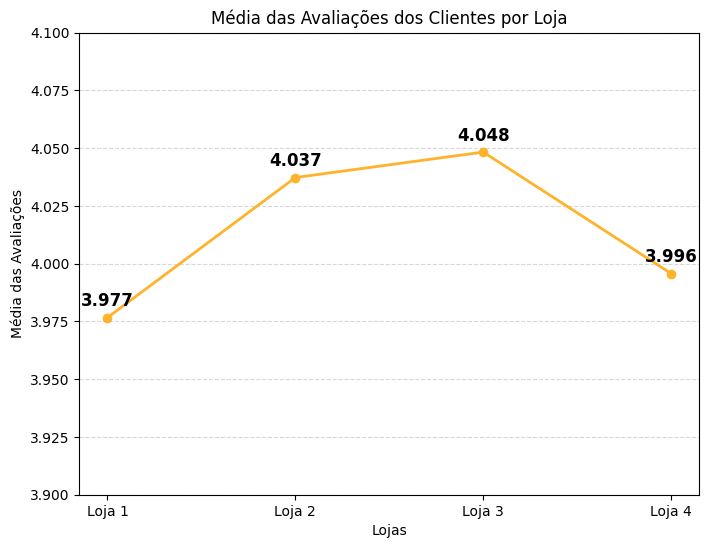

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Criando o gr√°fico de linhas
plt.plot(media_avaliacoes_por_loja["Lojas"], media_avaliacoes_por_loja["M√©dia_Avalia√ß√µes"], marker="o", linestyle="-", color="#FFB22C", linewidth=2)

plt.xlabel("Lojas")
plt.ylabel("M√©dia das Avalia√ß√µes")
plt.title("M√©dia das Avalia√ß√µes dos Clientes por Loja")
plt.ylim(3.9, 4.1)  # Ajusta escala para focar nas diferen√ßas sutis
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibir os valores nos pontos do gr√°fico
for i, v in enumerate(media_avaliacoes_por_loja["M√©dia_Avalia√ß√µes"]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center", fontsize=12, fontweight="bold")

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [20]:
produtos_vendidos_por_loja = df_unificado.groupby(["Lojas", "Produto"])["Produto"].count().reset_index(name="Quantidade_Vendas")

produtos_vendidos_por_loja_sorted = produtos_vendidos_por_loja.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])

mais_vendidos_por_loja = produtos_vendidos_por_loja_sorted.groupby("Lojas").head(1)  # Produto mais vendido por loja
menos_vendidos_por_loja = produtos_vendidos_por_loja_sorted.groupby("Lojas").tail(1)  # Produto menos vendido por loja

print("Mais vendidos:")
print(mais_vendidos_por_loja)
print("\nMenos vendidos:")
print(menos_vendidos_por_loja)


Mais vendidos:
      Lojas                   Produto  Quantidade_Vendas
24   Loja 1             Guarda roupas                 60
79   Loja 2  Iniciando em programa√ß√£o                 65
134  Loja 3             Kit banquetas                 57
161  Loja 4                  Cama box                 62

Menos vendidos:
      Lojas            Produto  Quantidade_Vendas
26   Loja 1            Headset                 33
82   Loja 2  Jogo de tabuleiro                 32
105  Loja 3   Blocos de montar                 35
178  Loja 4           Guitarra                 33


In [41]:
# Agrupar e contar vendas de produtos por loja
produtos_vendidos_por_loja = df_unificado.groupby(["Lojas", "Produto"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Ordenar por Loja e quantidade de vendas
produtos_vendidos_por_loja_sorted = produtos_vendidos_por_loja.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])

# Selecionar os 5 mais vendidos por loja
top_5_mais_vendidos = produtos_vendidos_por_loja_sorted.groupby("Lojas").head(5)

# Exibir os resultados
print("Top 5 produtos mais vendidos por loja:")
print(top_5_mais_vendidos)

Top 5 produtos mais vendidos por loja:
      Lojas                   Produto  Quantidade_Vendas
24   Loja 1             Guarda roupas                 60
37   Loja 1               Micro-ondas                 60
47   Loja 1             TV Led UHD 4K                 60
43   Loja 1        Secadora de roupas                 58
3    Loja 1          Blocos de montar                 56
79   Loja 2  Iniciando em programa√ß√£o                 65
88   Loja 2               Micro-ondas                 62
52   Loja 2                   Bateria                 61
91   Loja 2                  Pandeiro                 58
100  Loja 2                    Viol√£o                 58
134  Loja 3             Kit banquetas                 57
111  Loja 3                 Cama king                 56
138  Loja 3            Mesa de jantar                 56
119  Loja 3                    C√¥moda                 55
132  Loja 3           Jogo de panelas                 55
161  Loja 4                  Cama box        

In [42]:
# Selecionar os 5 menos vendidos por loja
top_5_menos_vendidos = produtos_vendidos_por_loja_sorted.groupby("Lojas").tail(5)

# Exibir os resultados
print("Top 5 produtos menos vendidos por loja:")
print(top_5_menos_vendidos)

Top 5 produtos menos vendidos por loja:
      Lojas             Produto  Quantidade_Vendas
38   Loja 1             Mochila                 39
40   Loja 1            Pandeiro                 36
41   Loja 1   Panela de press√£o                 35
11   Loja 1        Celular ABXY                 33
26   Loja 1             Headset                 33
73   Loja 2      Fone de ouvido                 37
93   Loja 2            Poltrona                 35
78   Loja 2          Impressora                 34
87   Loja 2      Mesa de jantar                 34
82   Loja 2   Jogo de tabuleiro                 32
127  Loja 3            Guitarra                 38
131  Loja 3       Jogo de copos                 36
139  Loja 3         Micro-ondas                 36
140  Loja 3             Mochila                 36
105  Loja 3    Blocos de montar                 35
176  Loja 4           Geladeira                 38
187  Loja 4  Lavadora de roupas                 38
202  Loja 4              Viol√£o         

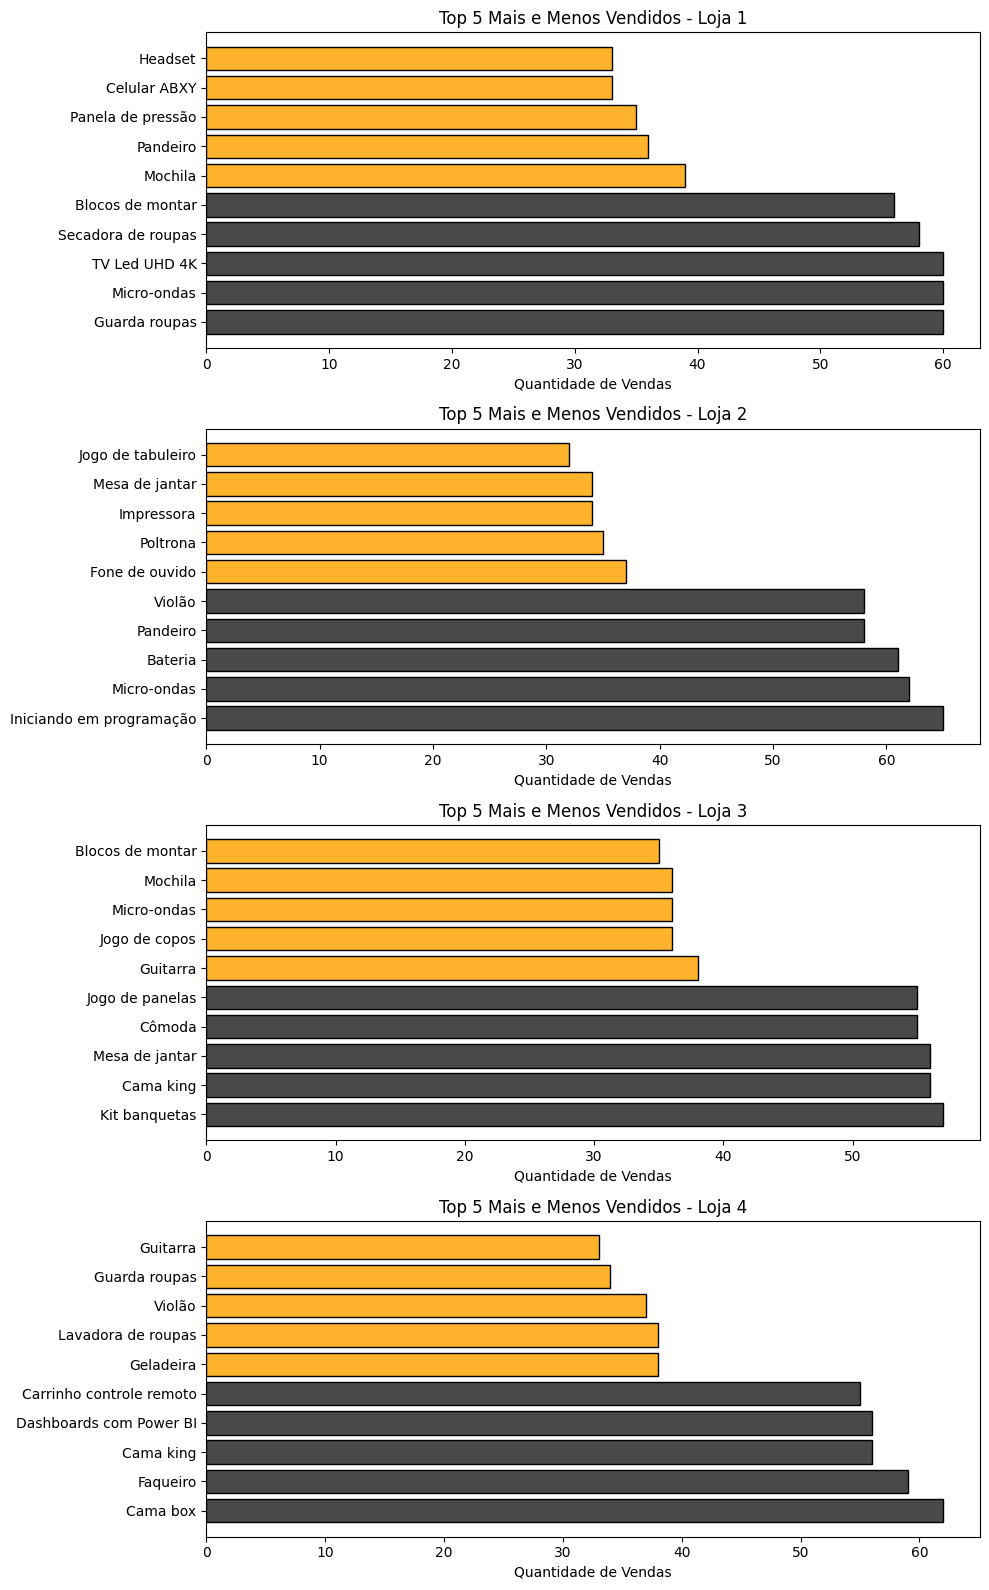

In [46]:
import matplotlib.pyplot as plt

# Criar gr√°ficos para cada loja
lojas = produtos_vendidos_por_loja_sorted["Lojas"].unique()
fig, axes = plt.subplots(len(lojas), 1, figsize=(10, len(lojas) * 4))

for i, loja in enumerate(lojas):
    dados_loja = produtos_vendidos_por_loja_sorted[produtos_vendidos_por_loja_sorted["Lojas"] == loja]

    # Selecionar 5 mais vendidos e 5 menos vendidos
    top_5_mais_vendidos = dados_loja.head(5)
    top_5_menos_vendidos = dados_loja.tail(5)

    # Concatenar para exibir em um √∫nico gr√°fico
    dados_plot = pd.concat([top_5_mais_vendidos, top_5_menos_vendidos])

    axes[i].barh(dados_plot["Produto"], dados_plot["Quantidade_Vendas"], color=["#4A4947"] * 5 + ["#FFB22C"] * 5, edgecolor="black")
    axes[i].set_title(f"Top 5 Mais e Menos Vendidos - {loja}")
    axes[i].set_xlabel("Quantidade de Vendas")

plt.tight_layout()
plt.show()

# 5. Frete M√©dio por Loja


Pelos valores apresentados, os custos m√©dios de frete por loja s√£o relativamente pr√≥ximos, sem grandes discrep√¢ncias. A diferen√ßa entre a loja com maior custo de 34,69 e a loja com menor custo de 31,27√© de aproximadamente R$3,41, o que indica uma varia√ß√£o pequena e consistente.



In [25]:
custo_medio_frete_por_loja = df_unificado.groupby("Lojas")["Frete"].mean().reset_index()
custo_medio_frete_por_loja.rename(columns={f"Frete": "Custo_M√©dio_Frete:"}, inplace=True)
custo_medio_frete_por_loja["Custo_M√©dio_Frete:"] = custo_medio_frete_por_loja["Custo_M√©dio_Frete:"].apply(lambda x: f"R$ {x:,.2f}")

print(custo_medio_frete_por_loja)


    Lojas Custo_M√©dio_Frete:
0  Loja 1           R$ 34.69
1  Loja 2           R$ 33.62
2  Loja 3           R$ 33.07
3  Loja 4           R$ 31.28


In [26]:
import pandas as pd

# Criar tabela formatada com pandas
from IPython.display import display

display(custo_medio_frete_por_loja.style.set_caption("Custo M√©dio de Frete por Loja")
                                      .set_properties(**{'text-align': 'center'})
                                      .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))


from tabulate import tabulate

print(tabulate(custo_medio_frete_por_loja, headers="keys", tablefmt="pipe"))

|    | Lojas   | Custo_M√©dio_Frete:   |
|---:|:--------|:---------------------|
|  0 | Loja 1  | R$ 34.69             |
|  1 | Loja 2  | R$ 33.62             |
|  2 | Loja 3  | R$ 33.07             |
|  3 | Loja 4  | R$ 31.28             |


####Calculo % frete em rela√ß√£o ao faturamento total

In [53]:
# Dados de custo m√©dio de frete por loja
custo_medio_frete_por_loja = {
    "Loja 1": 34.69,
    "Loja 2": 33.62,
    "Loja 3": 33.07,
    "Loja 4": 31.28
}

# Supondo que faturamento_total_por_loja j√° tenha sido calculado anteriormente
percentual_frete = {loja: (custo_medio_frete_por_loja[loja] / faturamento_total_por_loja.loc[loja]) * 100 for loja in faturamento_total_por_loja.index}

# Formatando os valores para exibi√ß√£o
percentual_frete_formatado = {loja: f"{valor:}%" for loja, valor in percentual_frete.items()}

# Exibindo os resultados
print("Percentual do Custo de Frete em rela√ß√£o ao Faturamento Total por Loja:")
print(percentual_frete_formatado)

Percentual do Custo de Frete em rela√ß√£o ao Faturamento Total por Loja:
{'Loja 1': '0.0022606577926366444%', 'Loja 2': '0.002258711771353657%', 'Loja 3': '0.002258841162025761%', 'Loja 4': '0.0022593033351492025%'}


In [48]:
print(custo_medio_frete_por_loja.keys())
print(faturamento_total_por_loja.keys())

dict_keys(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])
Index(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], dtype='object', name='Lojas')


###Usando as coordenadas geogr√°ficas para mapear as vendas e explorar padr√µes que possam influenciar o desempenho das lojas.

###  Gr√°ficos extras An√°lise de desempenho geogr√°fico






Agrupar os dados por Lojas e localiza√ß√£o de compras vai ajudar a visualizar quais regi√µes t√™m mais compradores para cada loja, revelando tend√™ncias e padr√µes de venda.


In [57]:
print(df_unificado["Lojas"].unique())


['Loja 1' 'Loja 2' 'Loja 3' 'Loja 4']


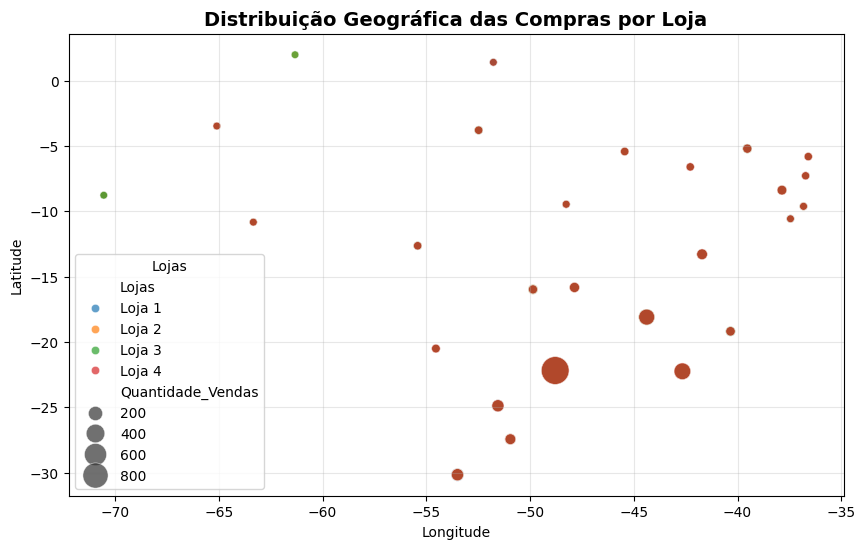

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e contar compras por loja e localiza√ß√£o
compras_por_regiao = df_unificado.groupby(["lon", "lat", "Lojas"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Criar um mapa de calor para visualizar vendas por regi√£o
plt.figure(figsize=(10, 6))
sns.scatterplot(data=compras_por_regiao, x="lon", y="lat", hue="Lojas", size="Quantidade_Vendas", sizes=(30, 400), palette="tab10", alpha=0.7)

plt.title("Distribui√ß√£o Geogr√°fica das Compras por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Lojas")
plt.grid(alpha=0.3)

plt.show()

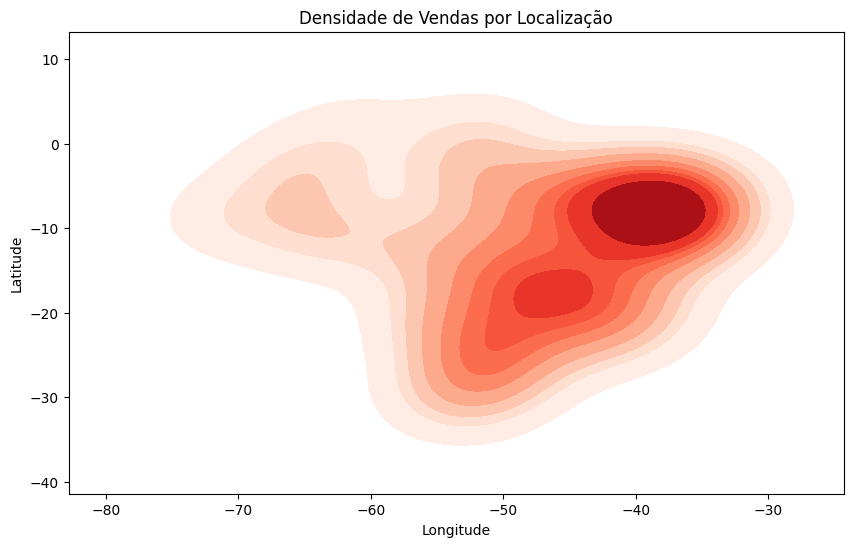

In [59]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=compras_por_regiao["lon"], y=compras_por_regiao["lat"], cmap="Reds", fill=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Densidade de Vendas por Localiza√ß√£o")
plt.show()

        count       mean         std  min    25%   50%   75%    max
Lojas                                                              
Loja 1   26.0  90.730769  197.934041  1.0  10.25  22.0  69.5  984.0
Loja 2   26.0  90.730769  198.832102  1.0   7.50  19.5  76.0  985.0
Loja 3   27.0  87.370370  194.747005  1.0   6.50  22.0  67.0  983.0
Loja 4   25.0  94.320000  202.585932  3.0  14.00  27.0  80.0  991.0


<ipython-input-63-177ae3e1bb2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compras_por_regiao, x="Lojas", y="Quantidade_Vendas", estimator=sum, palette="viridis")


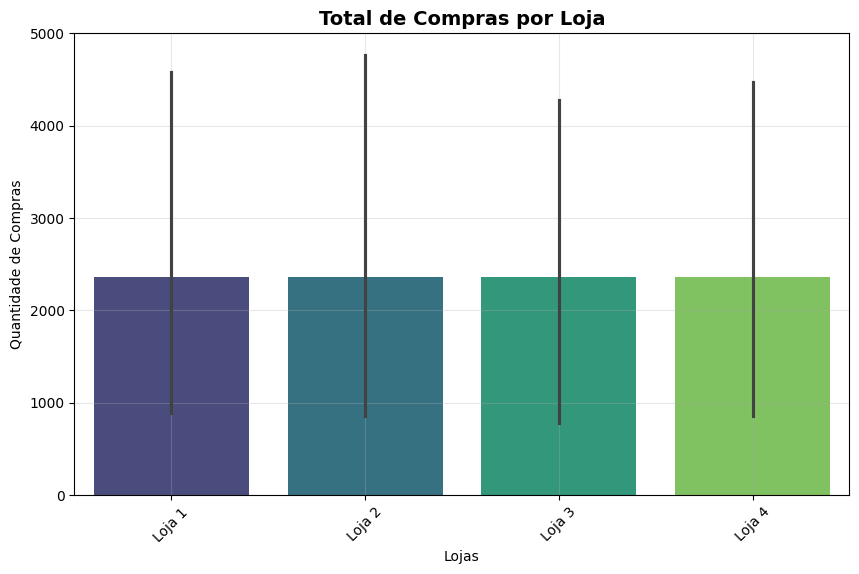

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular estat√≠sticas por loja
estatisticas_lojas = compras_por_regiao.groupby("Lojas")["Quantidade_Vendas"].describe()

print(estatisticas_lojas)  # Exibe a tabela com m√©dia, mediana, desvio padr√£o e outros dados

# Criar um gr√°fico de barras para comparar a quantidade total de vendas por loja
plt.figure(figsize=(10, 6))
sns.barplot(data=compras_por_regiao, x="Lojas", y="Quantidade_Vendas", estimator=sum, palette="viridis")

plt.title("Total de Compras por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas")
plt.ylabel("Quantidade de Compras")
plt.xticks(rotation=45)  # Girar os nomes das lojas para melhor visualiza√ß√£o
plt.grid(alpha=0.3)

plt.show()

###Mapa de calor para destacar √°reas de maior volume de vendas

Com o heatMap podemos visualizar regi√µes de alta concentra√ß√£o de compras.


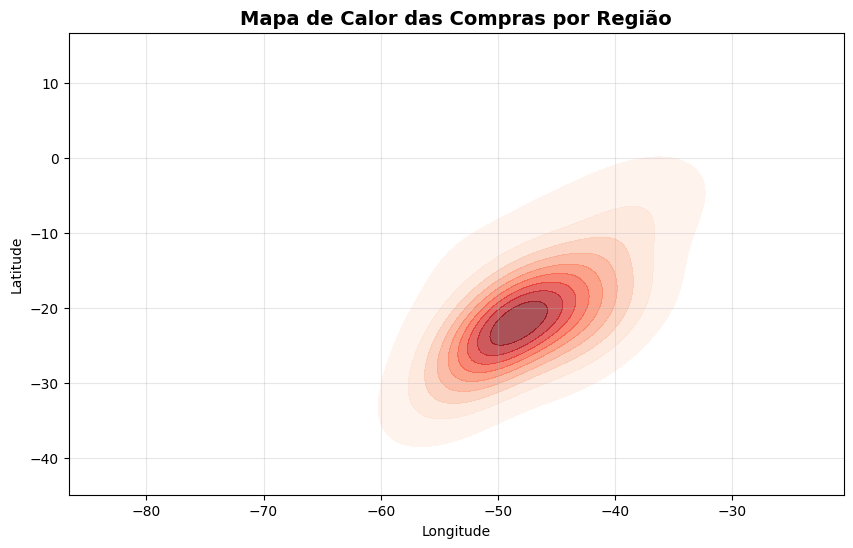

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e contar compras por coordenadas geogr√°ficas
compras_por_local = df_unificado.groupby(["lon", "lat"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Criar o mapa de calor
plt.figure(figsize=(10, 6))
sns.kdeplot(data=compras_por_local, x="lon", y="lat", weights="Quantidade_Vendas", cmap="Reds", fill=True, alpha=0.7)

plt.title("Mapa de Calor das Compras por Regi√£o", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)

plt.show()

#Relat√≥rio Final: ‚úÖ


##üìñ 1. O Desafio do Sr. Jo√£o
#### Ap√≥s anos no mercado, o Sr. Jo√£o percebeu que era hora de inovar. Ele deseja iniciar um novo empreendimento, mas para isso precisa vender uma de suas lojas. A decis√£o n√£o pode ser feita no impulso‚Äîela deve ser fundamentada em dados. Qual das quatro unidades da Alura Store apresenta menor efici√™ncia? Essa √© a quest√£o que guia esta an√°lise.

###‚úî Objetivo do relat√≥rio:
#### Este relat√≥rio tem como objetivo recomendar ao nosso cliente, Sr. Jo√£o, qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. A an√°lise descritiva dos dados ajudar√° a fornecer uma leitura clara e fundamentada do atual cen√°rio do neg√≥cio, auxiliando na tomada de decis√£o.

###‚úî Metodologia usada para an√°lise

#### Os dados utilizados neste relat√≥rio foram extra√≠dos do sistema de vendas da Alura Store. Foi realizado um filtro por loja que resultou em 4 arquivos CSVs, contendo as seguintes colunas em cada arquivo:
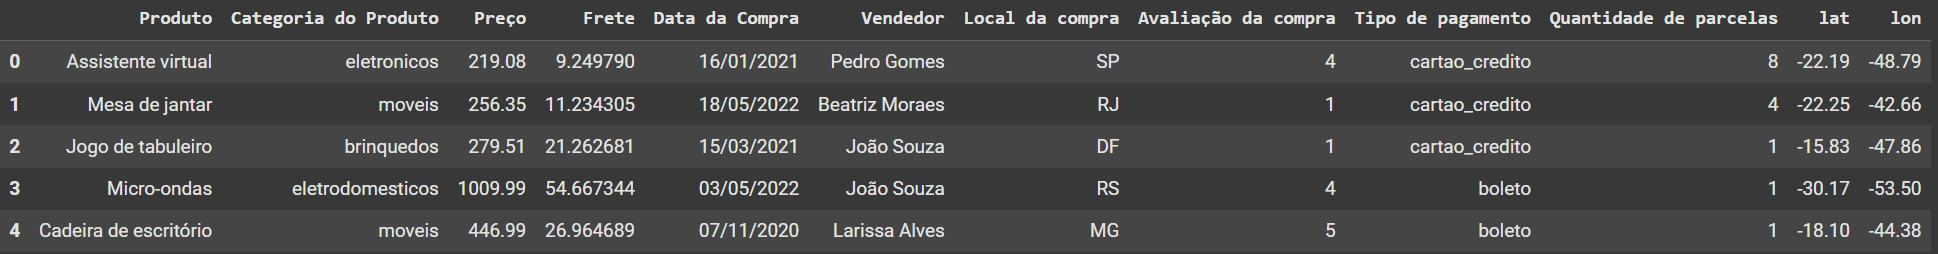



####Os dados acima foram carregados e manipulados com a biblioteca Pandas. A biblioteca Matplotlib foi usada para criar visualiza√ß√µes de dados juntamente com Seaborn. Com essas ferramentas foi possivel analisar m√©tricas como faturamento, avalia√ß√µes e desempenho de vendas.

## üìä 2. Investigando os Dados
####Para responder a pergunta que tanto tem tirado o sono do Sr. Jo√£o, analisamos diversos fatores: faturamento, categorias mais vendidas, avalia√ß√µes dos clientes, produtos mais e menos vendidos e por fim frete m√©dio.
####Inicialmente, foi criado um dataframe unificado com todas as lojas contendo a coluna "Lojas". Dessa forma facilitamos os calculos trabalhando criando dataframes especificos para cada tipo de an√°lise, se necess√°rio. O DataFrame unificado totalizou 9435 linhas e 13 colunas. Cada m√©trica nos aproxima de uma conclus√£o precisa. Afinal, a efici√™ncia de uma loja vai muito al√©m do faturamento bruto‚Äîenvolve satisfa√ß√£o dos clientes, custos operacionais e sustentabilidade do neg√≥cio.
###2.1 An√°lise do faturamento

####O gr√°fico abaixo "Faturamento Total por Loja" exibe o total de receita gerado por cada unidade da Alura Store, possibilitando uma compara√ß√£o direta entre elas. A  Loja 1 tem o maior faturamento total: *R$`1,534,509.12`*, indicando forte desempenho financeiro. J√° a Loja 4 tem o menor faturamento total:*R$`1,384,497.58`*. A diferen√ßa entre as lojas √© significativa, embora todas tenham faturamento na casa dos milh√µes, h√° um gap de quase **`R$ 150 mil`** entre a Loja 1 e a Loja 4.



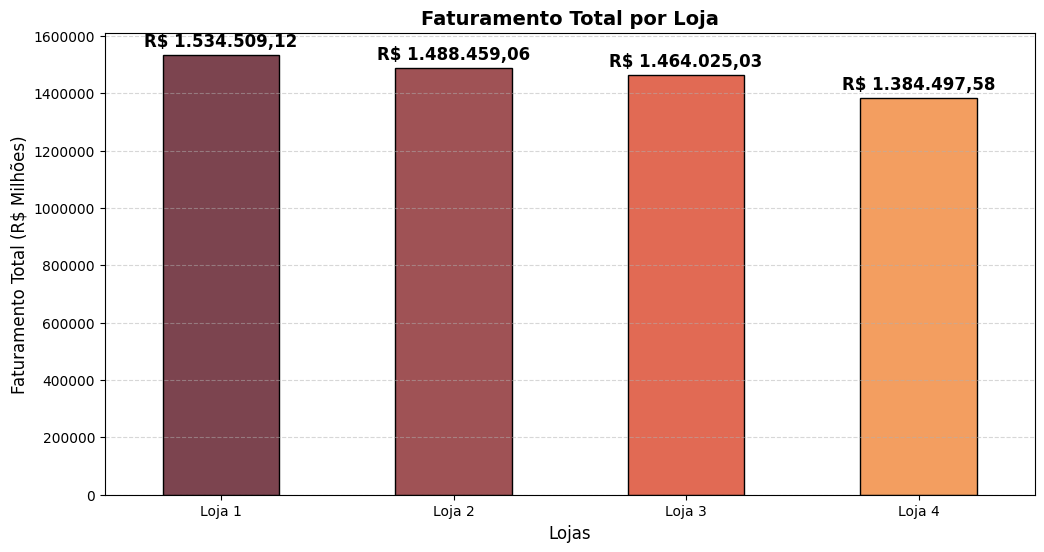

####Combinando a informa√ß√£o acima com  o gr√°fico ‚ÄúFaturamento M√©dio por Loja‚Äù que mostra a m√©dia de receita em Reais, podemos interpretar que a loja 1 tamb√©m tem maior faturamento m√©dio *`R$ 650,49`*, indicando que, em m√©dia, ela vende mais por transa√ß√£o, comparando com a Loja 4 que tem o menor faturamento m√©dio de *`R$ 587,15`*, um indicativo de que pode ter dificuldades em gerar ticket alto por compra. Se queremos identificar a loja menos eficiente, esse gr√°fico sugere que a Loja 4 pode ser um forte candidata, pois apresenta menor faturamento m√©dio por compra. Mas ainda √© um pouco cedo para essa conclus√£o, n√£o achas?






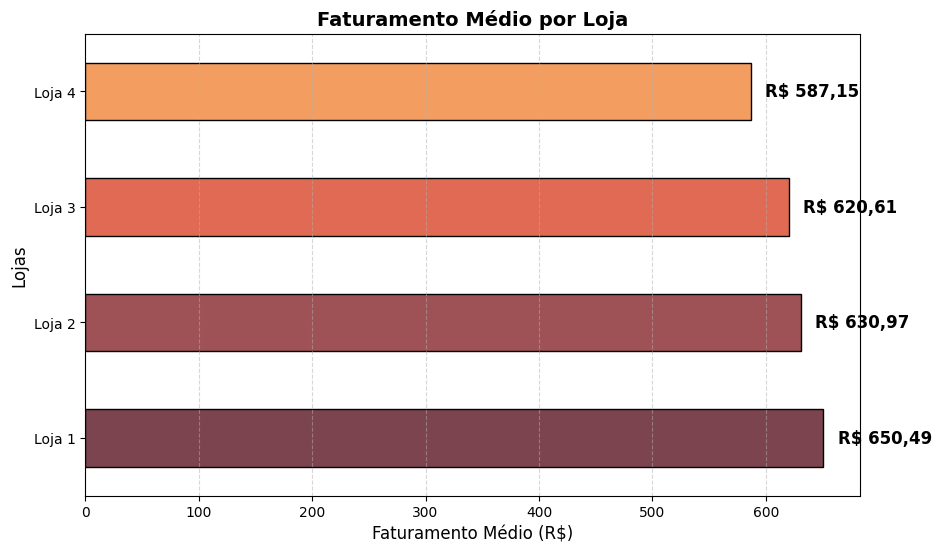

###2.2 Quantidade de produtos vendidos por categoria
#### Continuando a nossa an√°lise foi a hora de conhecer os produtos mais vendidos por categoria. Analisando o grafico de abaixo podemos destacar o seguinte:
####**Distribui√ß√£o de vendas por categoria:**
####M√≥veis e Eletr√¥nicos parecem estar entre as categorias mais vendidas em todas as lojas, essas categorias provavelmente impulsionam o faturamento das lojas, j√° que itens eletr√¥nicos e m√≥veis tendem a ter um ticket m√©dio mais alto. A loja 4 mant√©m o padr√£o n√£o sendo um fator para a sua baixa perfomance.


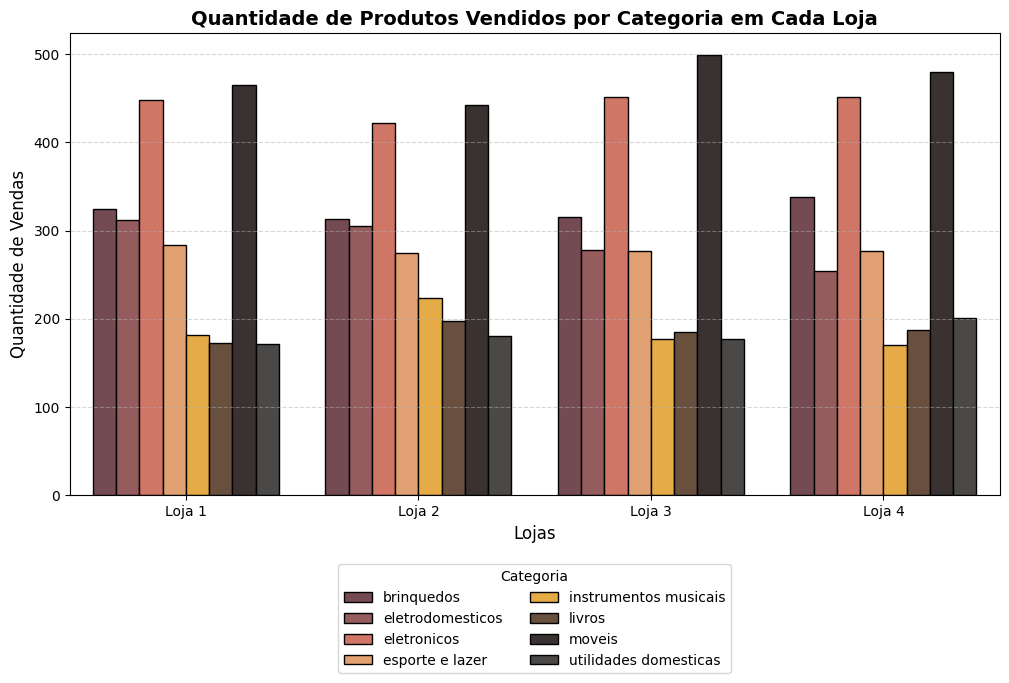

#### Descobrimos ainda que o faturamento com moveis e Eletronicos corresponde e a mais da metade do total em cada unidade, conforme mostra a tabela abaixo.Nela √© possivel verificar que a Loja 4 depende ainda mais dessas categorias (57.98%), pois apesar de ter o menor faturamento total, ela tem o maior percentual vindo de M√≥veis e Eletr√¥nicos. Isso evidencia uma depend√™ncia de M√≥veis e Eletr√¥nicos tornando a Loja 4 menos resiliente a mudan√ßas no mercado.

#####*Percentual de Faturamento das Categorias M√≥veis e Eletr√¥nicos por Loja*

| Loja  | Percentual |
|-------|-----------|
| Loja 1 | **53.62%** |
| Loja 2 | **52.61%** |
| Loja 3 | **55.72%** |
| Loja 4 | **57.98%** |




###2.3 Produtos mais e menos vendidos
####Para a an√°lise dos produtos mais e menos vendidos, construimos um gr√°fico com os top 5 mais e menos vendidos em cada loja, o que nos d√° uma vis√£o clara sobre a demanda.
####**Varia√ß√£o entre lojas:** Cada loja tem um conjunto diferente de produtos menos vendidos, o que sugere que a demanda muda conforme o p√∫blico e a localiza√ß√£o. Exemplo: Na Loja 4, produtos de maior valor como Lavadora de roupas e Geladeira aparecem entre os menos vendidos, o que pode indicar que essa unidade tem menor procura por eletrodom√©sticos.
####Dentre as categorias menos vendidas os Instrumentos musicais (Guitarra, Viol√£o, Pandeiro) aparecem em diversas lojas como pouco vendidos, M√≥veis (Guarda-roupas e Mesa de Jantar) tamb√©m aparecem entre os menos vendidos em algumas lojas. Tamb√©m vemos que os itens de cozinha (Jogo de panelas, Panela de press√£o) t√™m baixa sa√≠da em algumas unidades.




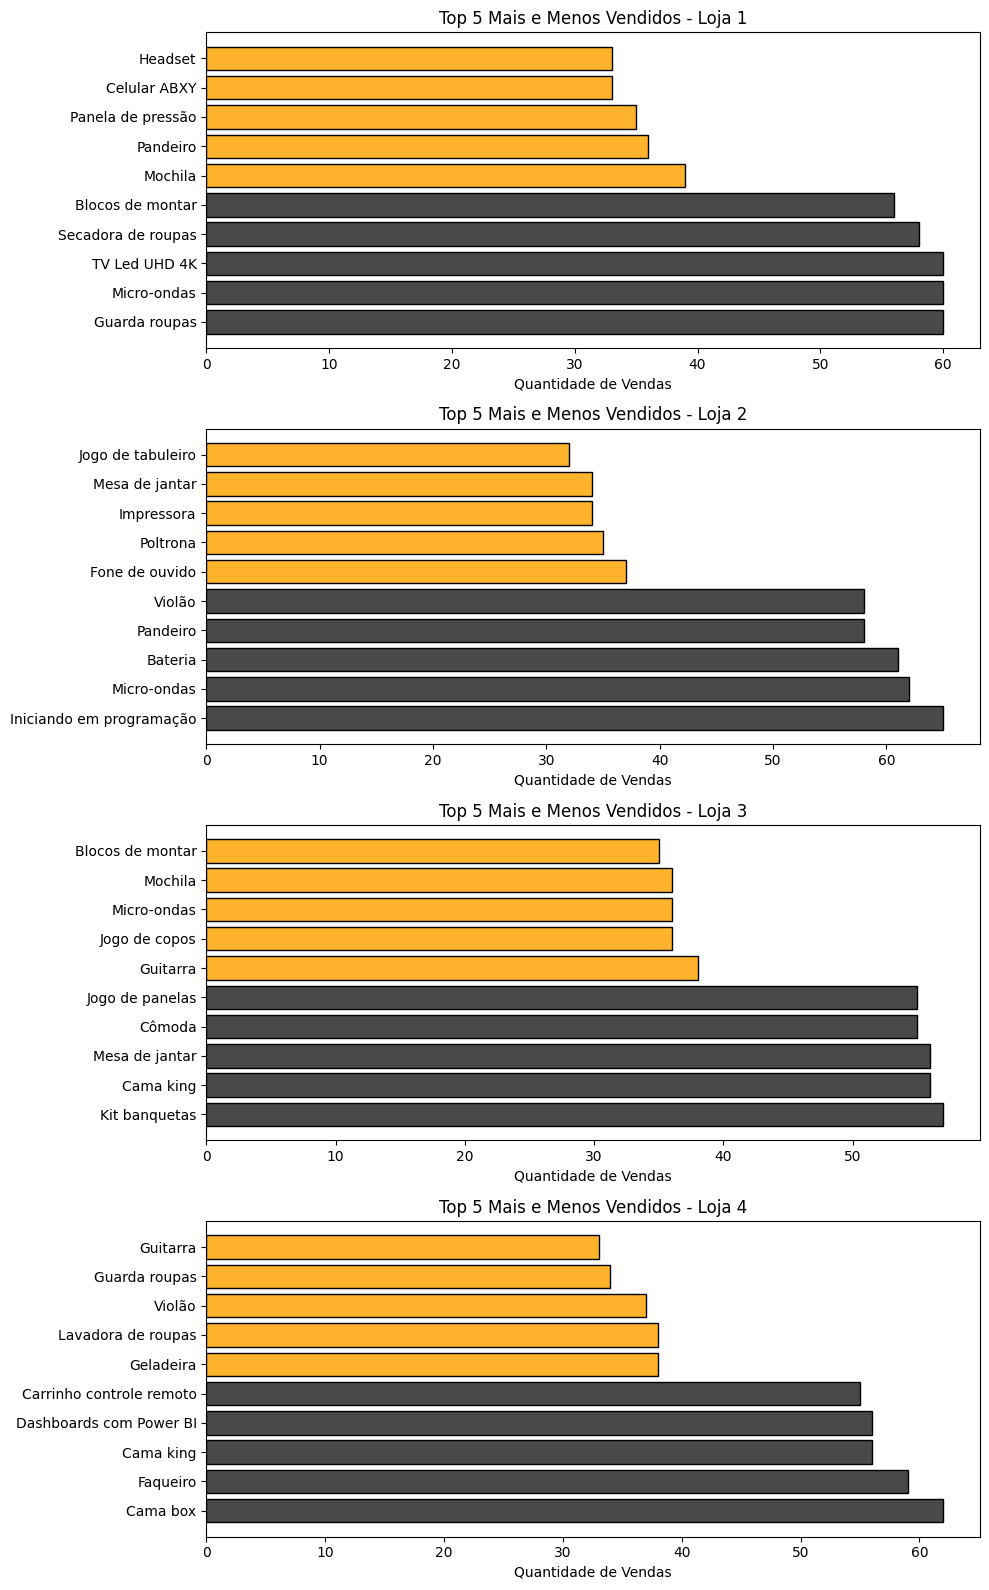

####Dentre os **produtos mais vendidos**, os Produtos eletr√¥nicos dominam as vendas. Em v√°rias lojas, itens como **Celular ABXY, Headset Gamer e Notebook** aparecem entre os mais vendidos. Isso indica que eletr√¥nicos s√£o uma categoria essencial para a receita da Alura Store.
#####Alguns m√≥veis tamb√©m se destacam, Produtos como **Mesa de jantar e Guarda-roupas** tiveram alta demanda em algumas unidades.Isso sugere que os clientes buscam n√£o apenas tecnologia, mas tamb√©m itens para casa.
####**Diferen√ßa de perfil entre lojas**  
####Algumas lojas focam mais em eletr√¥nicos, enquanto outras vendem mais m√≥veis.




###2.4 M√©dia de Avalia√ß√£o das Lojas
####A m√©dia das avalia√ß√µes dos clientes para cada loja teve como objetivo entender a satisfa√ß√£o dos clientes com os produtos vendidos.
#### **Principais descobertas**
####** A Loja 3 tem a melhor m√©dia de avalia√ß√µes**, com **4.048** indicando que seus clientes est√£o mais satisfeitos.Isso pode sugerir que o atendimento, a variedade de produtos ou a experi√™ncia de compra s√£o superiores em rela√ß√£o √†s demais.
####Loja 1 tem a menor avalia√ß√£o (3.977)**, comparada √†s outras lojas, o que pode significar que os clientes tiveram **mais problemas** nessa unidade, como qualidade do atendimento, disponibilidade de produtos ou processos de compra.
#### No entnato, a **Loja 4 tem um desempenho intermedi√°rio** com **3.996**, n√£o √© a pior, mas tamb√©m n√£o est√° entre as melhores.
####**Pequenas diferen√ßas, mas impacto relevante** A varia√ß√£o entre as lojas n√£o √© t√£o grande, mas mesmo pequenas diferen√ßas podem indicar **tend√™ncias importantes** sobre a experi√™ncia dos clientes.



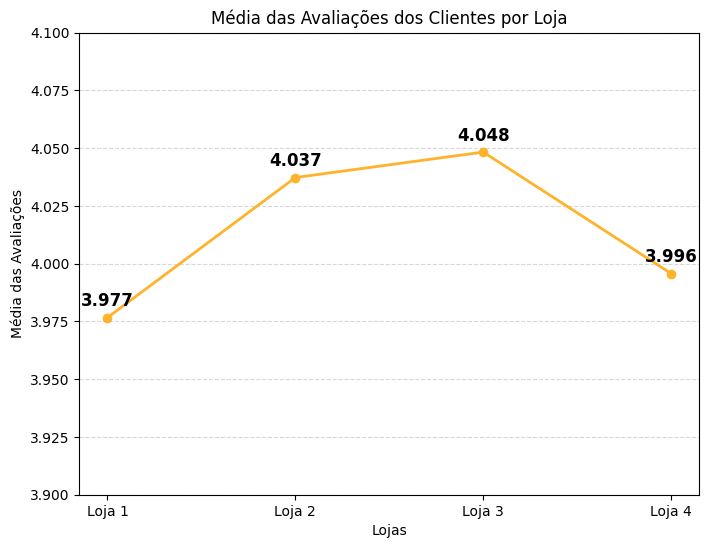

###2.5 Custo m√©dio frete
#### O custo m√©dio de frete para cada loja nos mostra quanto, em m√©dia, est√° sendo gasto com frete para cada uma das lojas. Tamb√©m nos d√° insights importantes sobre a log√≠stica e efici√™ncia de cada loja.
####Loja 1 tem o maior custo m√©dio de frete (`R$ 34.69`): Isso pode indicar que essa unidade est√° enviando pedidos para regi√µes mais distantes ou que h√° menor efici√™ncia na negocia√ß√£o de tarifas com transportadoras. Outra possibilidade √© que os pedidos dessa loja tenham caracter√≠sticas que tornam o frete mais caro (mais pesados ou volumosos).
####Loja 4 tem o menor custo m√©dio de frete (`R$ 31.28`) Essa unidade pode estar localizada estrategicamente em uma regi√£o com menores custos log√≠sticos.Pode tamb√©m ser a loja que mais otimiza envios, agrupando produtos para reduzir custos por pedido.
####Pequena varia√ß√£o entre lojas, mas impacto no custo operacional A diferen√ßa entre a loja mais cara e a mais barata √© R$ 3.41. Embora pare√ßa pequena por pedido, ao longo de centenas/milhares de envios, essa diferen√ßa pode representar um impacto significativo nos custos totais da empresa.
####Calculamos o percentual do frete em rela√ß√£o ao faturamento total de cada loja para entender melhor o impacto desse custo nas finan√ßas e confirmamos que  o frete n√£o √© um custo problem√°tico, representando 0,002% para lojas.



| Lojas   | Custo_M√©dio_Frete:   |
|:--------|:---------------------|
| Loja 1  | `R$ 34.69`             |
| Loja 2  | `R$ 33.62`            |
| Loja 3  | `R$ 33.07`              |
| Loja 4  | `R$ 31.28`             |

##üí° 5. Conclus√£o: Qual loja vender?
#####Ap√≥s uma an√°lise detalhada de faturamento, avalia√ß√£o dos clientes, desempenho de produtos e custos operacionais, fica evidente que a Loja 4 apresenta menor efici√™ncia em rela√ß√£o √†s demais unidades da Alura Store.
#####**Principais fatores que justificam essa decis√£o:**
#####1. Menor faturamento total: A Loja 4 gera `R$ 1.384.497,58`, ficando significativamente atr√°s da Loja 1 (`R$ 1.534.509,12`).
#####2. Menor faturamento m√©dio por venda: O ticket m√©dio de compra √© `R$ 587,15`, o menor entre todas as lojas, indicando menor capacidade de gerar vendas de alto valor.
#####3. Alta depend√™ncia de poucas categorias: 57.98% do faturamento da Loja 4 vem de M√≥veis e Eletr√¥nicos, tornando-a menos resiliente a mudan√ßas no mercado.
#####4. Baixa demanda por produtos de maior valor: Eletrodom√©sticos como Geladeira e Lavadora de roupas aparecem entre os menos vendidos, sinalizando dificuldades em escoar itens mais caros.
#####5. Avalia√ß√£o dos clientes intermedi√°ria: A Loja 4 possui nota 3.996, n√£o sendo a pior, mas tamb√©m n√£o destacando-se como refer√™ncia em satisfa√ß√£o.
#####6. Frete n√£o influencia na decis√£o: Apesar da Loja 4 ter o menor custo m√©dio de frete (`R$ 31.28`), o impacto financeiro √© irrelevante (0.002% do faturamento).
#####Com base nesses fatores, recomenda-se que o Sr. Jo√£o venda a Loja 4, pois ela apresenta menor efici√™ncia e enfrenta desafios estruturais que podem dificultar sua recupera√ß√£o.


### üìÇDados extras: Impacto financeiro da venda da Loja 4
####Se a Loja 4 for vendida, a empresa deixar√° de faturar R$ 1.384.497,58, ou seja, aproximadamente 23.58% do faturamento total da rede. No entanto, essa perda pode ser compensada ao refor√ßar estrat√©gias nas demais lojas, focando em produtos com alta demanda e ampliando a efici√™ncia operacional.

### üìä Compara√ß√£o entre Lojas

| Indicador                | Loja 1           | Loja 2           | Loja 3           | Loja 4           |
|--------------------------|-----------------|-----------------|-----------------|-----------------|
| **Faturamento Total `(R$)`** | `1.534.509,12`    | X               | X               | `1.384.497,58`    |
| **Faturamento M√©dio `(R$)`** | `650,49`         | X               | X               | `**587,15**`      |
| **Percentual M√≥veis & Eletr√¥nicos** | 53.62%      | 52.61%         | 55.72%         | **57.98%**      |
| **Avalia√ß√£o dos clientes** | **3.977 (Menor)** | X              | **4.048 (Maior)** | 3.996         |
| **Custo m√©dio frete (R$)** | **34.69 (Maior)** | X              | X               | **31.28 (Menor)** |
| **Conclus√£o**             | Mant√©m          | Mant√©m          | Mant√©m          | **Vender**      |

#####Tabela final comparativa, para refor√ßar a conclus√£o e facilitar a interpreta√ß√£o dos dados!!!